Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 
Downlaod Files:

    https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

'W'(Wins):number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work 

'R'(Runs):number of times a player crosses home plate

'AB'(At Bats):plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

'H'(Hits):reaching base because of a batted, fair ball without error by the defense

'2B'(Doubles):Hits on which the batter reaches second base safely without the contribution of a fielding error

'3B'(Triples):hits on which the batter reaches third base safely without the contribution of a fielding error

'HR'(Homeruns):hits on which the batter successfully touched all four bases, without the contribution of a fielding error

'BB'(Walk):hitter not swinging at four pitches called out of the strike zone and awarded first base.

'SO'(Strikeout): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.

'SB'(Stolen Bases):number of bases advanced by the runner while the ball is in the possession of the defense 

'RA'(Runs Allowed):Runs Allowed is the amount of runs that score against a pitcher. This includes earned runs and unearned runs.

'ER'(Earned Runs): number of runs that did not occur as a result of errors or passed balls

'ERA'(Earned Run Average):total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

'CG'(Complete Games):number of games where player was the only pitcher for their team

'SHO'(Shutouts):number of complete games pitched with no runs allowed

'SV'(Saves):number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

'E'(Errors):number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import power_transform

In [52]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [53]:
df.shape

(30, 17)

In [54]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [55]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Check Missing Values

<AxesSubplot:>

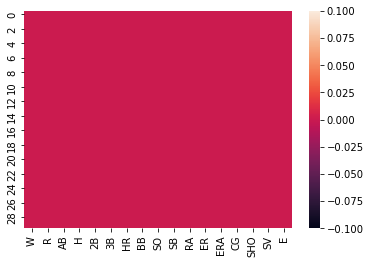

In [57]:
sns.heatmap(df.isnull())

In [58]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Data Vsualisation

In [59]:
for i in df:
    df[i]=df[i].astype(float)
df.dtypes

W      float64
R      float64
AB     float64
H      float64
2B     float64
3B     float64
HR     float64
BB     float64
SO     float64
SB     float64
RA     float64
ER     float64
ERA    float64
CG     float64
SHO    float64
SV     float64
E      float64
dtype: object

# Summary Statistics

In [60]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Correlation

In [61]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

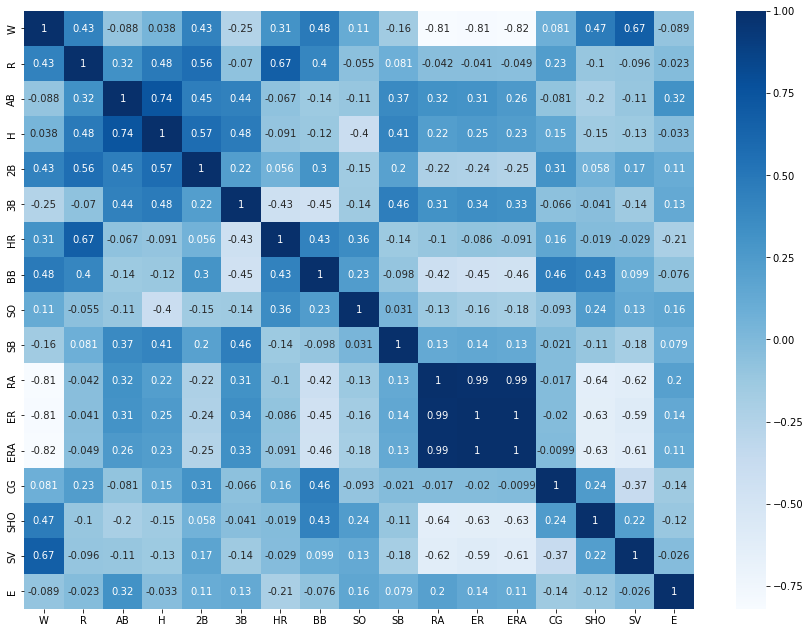

In [62]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [63]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<AxesSubplot:xlabel='RA', ylabel='W'>

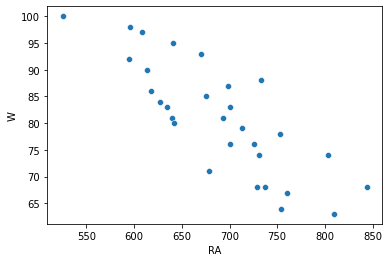

In [64]:
sns.scatterplot(data=df,x='RA',y='W')

<AxesSubplot:xlabel='ERA', ylabel='W'>

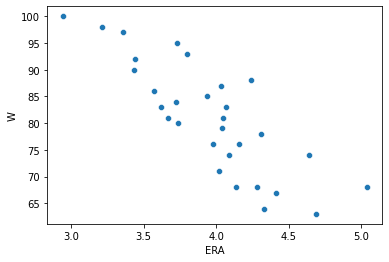

In [65]:
sns.scatterplot(data=df,x='ERA',y='W')

<AxesSubplot:xlabel='ER', ylabel='W'>

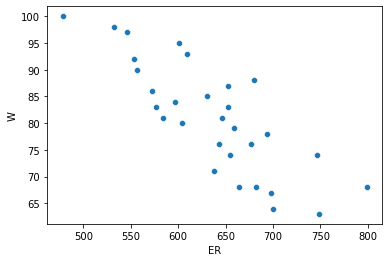

In [66]:
sns.scatterplot(data=df,x='ER',y='W')

In [67]:
# These 3 columns Have a high negative impact on 'W'(Target column)
#df.drop(['ER','ERA','RA'],axis=1,inplace=True)

In [68]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95.0,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,83.0,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,81.0,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,76.0,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,74.0,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0
5,93.0,891.0,5509.0,1480.0,308.0,17.0,232.0,570.0,1151.0,88.0,670.0,609.0,3.80,7.0,10.0,34.0,88.0
6,87.0,764.0,5567.0,1397.0,272.0,19.0,212.0,554.0,1227.0,63.0,698.0,652.0,4.03,3.0,4.0,48.0,93.0
7,81.0,713.0,5485.0,1370.0,246.0,20.0,217.0,418.0,1331.0,44.0,693.0,646.0,4.05,0.0,10.0,43.0,77.0
8,80.0,644.0,5485.0,1383.0,278.0,32.0,167.0,436.0,1310.0,87.0,642.0,604.0,3.74,1.0,12.0,60.0,95.0
9,78.0,748.0,5640.0,1495.0,294.0,33.0,161.0,478.0,1148.0,71.0,753.0,694.0,4.31,3.0,10.0,40.0,97.0


# Checking Outliers

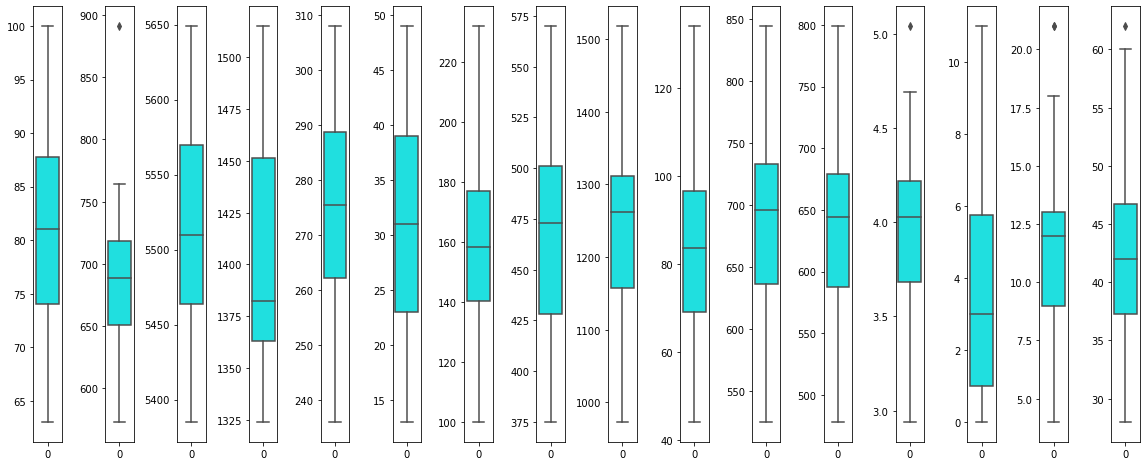

In [69]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

# Checking Skewness

<AxesSubplot:xlabel='R', ylabel='Density'>

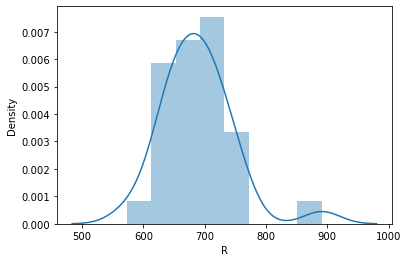

In [70]:
sns.distplot(df.R)

<AxesSubplot:xlabel='AB', ylabel='Density'>

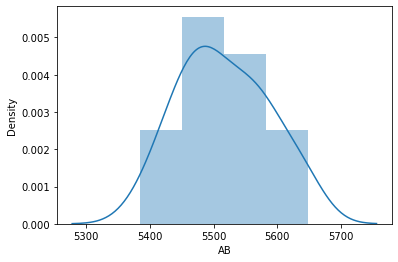

In [71]:
sns.distplot(df.AB)

<AxesSubplot:xlabel='H', ylabel='Density'>

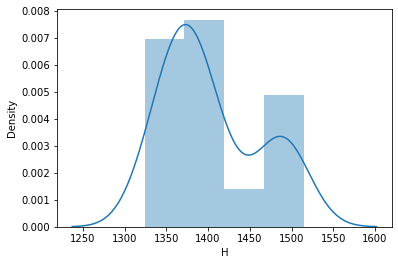

In [72]:
sns.distplot(df.H)

<AxesSubplot:xlabel='2B', ylabel='Density'>

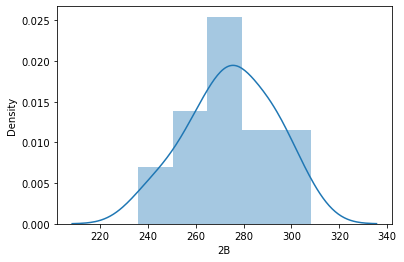

In [73]:
sns.distplot(df['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

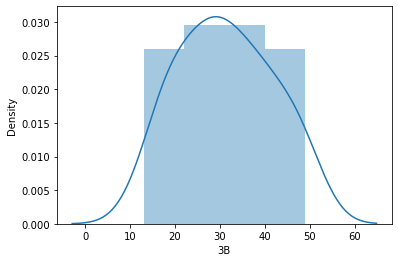

In [74]:
sns.distplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

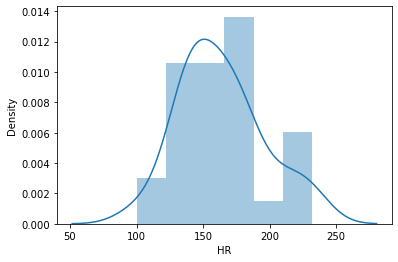

In [75]:
sns.distplot(df.HR)

<AxesSubplot:xlabel='BB', ylabel='Density'>

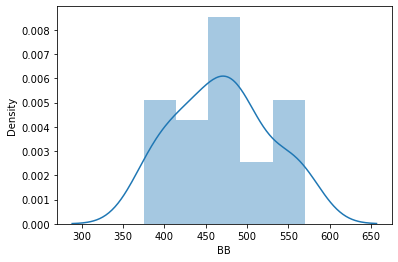

In [76]:
sns.distplot(df.BB)

<AxesSubplot:xlabel='SO', ylabel='Density'>

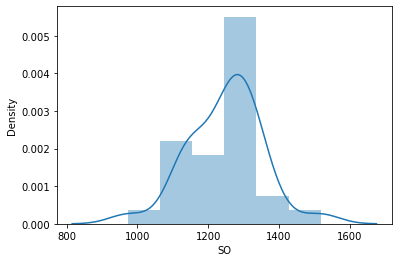

In [77]:
sns.distplot(df.SO)

<AxesSubplot:xlabel='SB', ylabel='Density'>

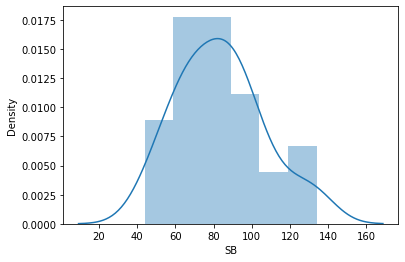

In [78]:
sns.distplot(df.SB)

<AxesSubplot:xlabel='RA', ylabel='Density'>

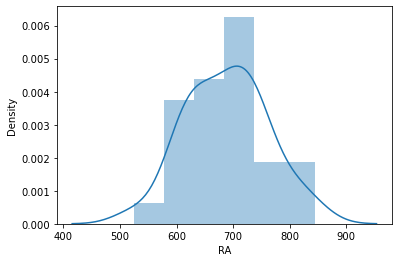

In [79]:
sns.distplot(df.RA)

<AxesSubplot:xlabel='ER', ylabel='Density'>

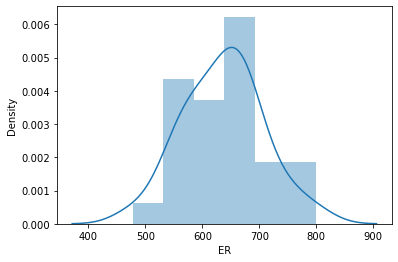

In [80]:
sns.distplot(df.ER)

<AxesSubplot:xlabel='ERA', ylabel='Density'>

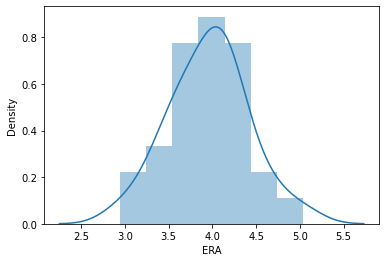

In [81]:
sns.distplot(df.ERA)

<AxesSubplot:xlabel='CG', ylabel='Density'>

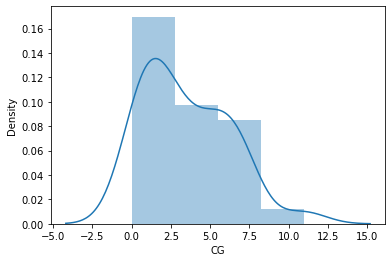

In [82]:
sns.distplot(df.CG)

<AxesSubplot:xlabel='SHO', ylabel='Density'>

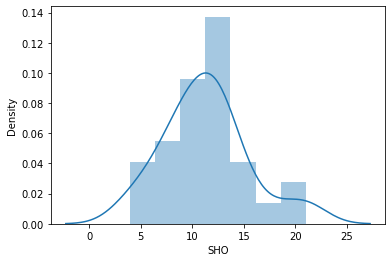

In [83]:
sns.distplot(df.SHO)

<AxesSubplot:xlabel='SV', ylabel='Density'>

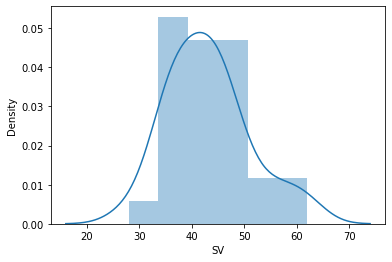

In [84]:
sns.distplot(df.SV)

<AxesSubplot:xlabel='E', ylabel='Density'>

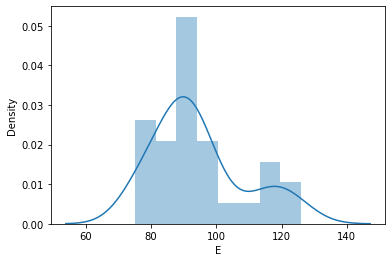

In [85]:
sns.distplot(df.E)

# Removing Outliers

In [86]:
z=np.abs(zscore(df))
z.shape

(30, 17)

In [87]:
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [88]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95.0,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,83.0,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,81.0,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,76.0,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,74.0,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0
6,87.0,764.0,5567.0,1397.0,272.0,19.0,212.0,554.0,1227.0,63.0,698.0,652.0,4.03,3.0,4.0,48.0,93.0
7,81.0,713.0,5485.0,1370.0,246.0,20.0,217.0,418.0,1331.0,44.0,693.0,646.0,4.05,0.0,10.0,43.0,77.0
8,80.0,644.0,5485.0,1383.0,278.0,32.0,167.0,436.0,1310.0,87.0,642.0,604.0,3.74,1.0,12.0,60.0,95.0
9,78.0,748.0,5640.0,1495.0,294.0,33.0,161.0,478.0,1148.0,71.0,753.0,694.0,4.31,3.0,10.0,40.0,97.0
10,88.0,751.0,5511.0,1419.0,279.0,32.0,172.0,503.0,1233.0,101.0,733.0,680.0,4.24,5.0,9.0,45.0,119.0


In [89]:
df.shape

(30, 17)

In [90]:
df_new.shape

(29, 17)

In [91]:
x=df_new.iloc[:,1:]
y=df_new.iloc[:,0]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,601.0,3.73,2.0,8.0,56.0,88.0
1,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,653.0,4.07,2.0,12.0,45.0,86.0
2,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,584.0,3.67,11.0,10.0,38.0,79.0
3,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,643.0,3.98,7.0,9.0,37.0,101.0
4,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,746.0,4.64,7.0,12.0,35.0,86.0


In [92]:
y.head()

0    95.0
1    83.0
2    81.0
3    76.0
4    74.0
Name: W, dtype: float64

In [94]:
x.shape

(29, 16)

In [95]:
y.shape

(29,)

# Selecting the Best Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt.fit(features_train,target_train)
    pred_train=dt.predict(features_train)
    pred_test=dt.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(target_test,pred_test)}")
    print('\n')
    acc=accuracy_score(target_test,pred_test)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc," on Random State: ",maxRS)

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 0.0


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 0.0


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 0.0


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 0.0


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 0.0


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 0.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 0.0


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 0.0


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 0.0


At random state 9,the training accuracy is:- 1.0
At random state 9,the testing accuracy is:- 0.0


At random 

At random state 86,the training accuracy is:- 1.0
At random state 86,the testing accuracy is:- 0.0


At random state 87,the training accuracy is:- 1.0
At random state 87,the testing accuracy is:- 0.0


At random state 88,the training accuracy is:- 1.0
At random state 88,the testing accuracy is:- 0.0


At random state 89,the training accuracy is:- 1.0
At random state 89,the testing accuracy is:- 0.0


At random state 90,the training accuracy is:- 1.0
At random state 90,the testing accuracy is:- 0.0


At random state 91,the training accuracy is:- 1.0
At random state 91,the testing accuracy is:- 0.0


At random state 92,the training accuracy is:- 1.0
At random state 92,the testing accuracy is:- 0.0


At random state 93,the training accuracy is:- 1.0
At random state 93,the testing accuracy is:- 0.0


At random state 94,the training accuracy is:- 1.0
At random state 94,the testing accuracy is:- 0.0


At random state 95,the training accuracy is:- 1.0
At random state 95,the testing accuracy i

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [97]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lmaxAcc=0
lmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>maxAcc):
        lmaxAcc=acc
        lmaxRS=i
print("Best accuracy: ",lmaxAcc," on Random State: ",lmaxRS)

At random state 0,the training accuracy is:- 0.979301718690075
At random state 0,the testing accuracy is:- 0.37642412024128014


At random state 1,the training accuracy is:- 0.9693516004448698
At random state 1,the testing accuracy is:- 0.7555241414909541


At random state 2,the training accuracy is:- 0.9664881232216759
At random state 2,the testing accuracy is:- -0.32929092499061063


At random state 3,the training accuracy is:- 0.9534657143080717
At random state 3,the testing accuracy is:- 0.8485894004113972


At random state 4,the training accuracy is:- 0.9611298547801513
At random state 4,the testing accuracy is:- 0.7514775069642743


At random state 5,the training accuracy is:- 0.9617989022273269
At random state 5,the testing accuracy is:- 0.5545096693427366


At random state 6,the training accuracy is:- 0.9603217707835178
At random state 6,the testing accuracy is:- 0.7473255183244963


At random state 7,the training accuracy is:- 0.9590946505307434
At random state 7,the testing a

At random state 64,the training accuracy is:- 0.9498377203433123
At random state 64,the testing accuracy is:- 0.8556290952095655


At random state 65,the training accuracy is:- 0.9801762997126912
At random state 65,the testing accuracy is:- 0.3979366711628435


At random state 66,the training accuracy is:- 0.9561260522887615
At random state 66,the testing accuracy is:- 0.6498495975003822


At random state 67,the training accuracy is:- 0.9518791307102057
At random state 67,the testing accuracy is:- 0.8157368204801279


At random state 68,the training accuracy is:- 0.9636311729119128
At random state 68,the testing accuracy is:- -0.08171472137611002


At random state 69,the training accuracy is:- 0.9627946030682473
At random state 69,the testing accuracy is:- 0.4717327998173343


At random state 70,the training accuracy is:- 0.9742526983397116
At random state 70,the testing accuracy is:- -0.1934547711675989


At random state 71,the training accuracy is:- 0.9881455904971488
At random state

In [163]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

kmaxAcc=0
kmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(features_train,target_train)
    pred_train=knr.predict(features_train)
    pred_test=knr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>kmaxAcc):
        kmaxAcc=acc
        kmaxRS=i
print("Best accuracy: ",kmaxAcc," on Random State: ",kmaxRS)

At random state 0,the training accuracy is:- 0.7682876426384635
At random state 0,the testing accuracy is:- 0.37570996978851967


At random state 1,the training accuracy is:- 0.7059073932773785
At random state 1,the testing accuracy is:- 0.7788066825775656


At random state 2,the training accuracy is:- 0.7683053740165675
At random state 2,the testing accuracy is:- -1.3448953068592062


At random state 3,the training accuracy is:- 0.6917181695004151
At random state 3,the testing accuracy is:- 0.5574222797927463


At random state 4,the training accuracy is:- 0.7506138227537121
At random state 4,the testing accuracy is:- 0.6826122448979592


At random state 5,the training accuracy is:- 0.7439565758074816
At random state 5,the testing accuracy is:- 0.7488588007736943


At random state 6,the training accuracy is:- 0.7485545795702916
At random state 6,the testing accuracy is:- 0.5770701590271283


At random state 7,the training accuracy is:- 0.8116626398779248
At random state 7,the testing a

At random state 73,the training accuracy is:- 0.7200927199151377
At random state 73,the testing accuracy is:- 0.49261442006269585


At random state 74,the training accuracy is:- 0.8279981030667088
At random state 74,the testing accuracy is:- -0.521911262798634


At random state 75,the training accuracy is:- 0.7013252964582593
At random state 75,the testing accuracy is:- 0.7299568345323741


At random state 76,the training accuracy is:- 0.726563526720732
At random state 76,the testing accuracy is:- 0.6247919876733437


At random state 77,the training accuracy is:- 0.7707880053512579
At random state 77,the testing accuracy is:- 0.34928571428571453


At random state 78,the training accuracy is:- 0.7178287584075623
At random state 78,the testing accuracy is:- 0.5401869158878508


At random state 79,the training accuracy is:- 0.7601939384422112
At random state 79,the testing accuracy is:- 0.5126781433863585


At random state 80,the training accuracy is:- 0.7404592653243514
At random state 8

In [162]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

dmaxAcc=0
dmaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(features_train,target_train)
    pred_train=dtr.predict(features_train)
    pred_test=dtr.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>dmaxAcc):
        dmaxAcc=acc
        dmaxRS=i
print("Best accuracy: ",dmaxAcc," on Random State: ",dmaxRS)

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- -0.3345921450151057


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- -0.2100238663484486


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- -1.5472924187725634


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 0.5977979274611398


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 0.4141287284144427


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- -1.780657640232108


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- -0.002432179607109397


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- -0.09328358208955234


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing a

At random state 76,the training accuracy is:- 1.0
At random state 76,the testing accuracy is:- 0.5423728813559323


At random state 77,the training accuracy is:- 1.0
At random state 77,the testing accuracy is:- -1.6339285714285716


At random state 78,the training accuracy is:- 1.0
At random state 78,the testing accuracy is:- -0.29172229639519354


At random state 79,the training accuracy is:- 1.0
At random state 79,the testing accuracy is:- 0.34626280235345386


At random state 80,the training accuracy is:- 1.0
At random state 80,the testing accuracy is:- 0.5197643014976676


At random state 81,the training accuracy is:- 1.0
At random state 81,the testing accuracy is:- 0.17295004712535333


At random state 82,the training accuracy is:- 1.0
At random state 82,the testing accuracy is:- 0.036080516521078465


At random state 83,the training accuracy is:- 1.0
At random state 83,the testing accuracy is:- 0.3420019627085378


At random state 84,the training accuracy is:- 1.0
At random state

In [161]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')

smaxAcc=0
smaxRS=0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(x,y,test_size=.20,random_state=i)
    sv.fit(features_train,target_train)
    pred_train=sv.predict(features_train)
    pred_test=sv.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print('\n')
    acc=r2_score(target_test,pred_test)
    if(acc>smaxAcc):
        smaxAcc=acc
        smaxRS=i
print("Best accuracy: ",smaxAcc," on Random State: ",smaxRS)

At random state 0,the training accuracy is:- 0.9442250903000372
At random state 0,the testing accuracy is:- 0.5495155449599114


At random state 1,the training accuracy is:- 0.8958853606929035
At random state 1,the testing accuracy is:- 0.9609720964184492


At random state 2,the training accuracy is:- 0.9157779866066077
At random state 2,the testing accuracy is:- 0.2721344090692823


At random state 3,the training accuracy is:- 0.9084956444757946
At random state 3,the testing accuracy is:- 0.833650699426311


At random state 4,the training accuracy is:- 0.9199844900631372
At random state 4,the testing accuracy is:- 0.8610000673406173


At random state 5,the training accuracy is:- 0.9172028446331192
At random state 5,the testing accuracy is:- 0.7821839828201193


At random state 6,the training accuracy is:- 0.8917955925813692
At random state 6,the testing accuracy is:- 0.8634829873409224


At random state 7,the training accuracy is:- 0.9285414518584704
At random state 7,the testing accu

At random state 77,the training accuracy is:- 0.9162613903570778
At random state 77,the testing accuracy is:- 0.735019826591294


At random state 78,the training accuracy is:- 0.911108411079239
At random state 78,the testing accuracy is:- 0.7462448865530387


At random state 79,the training accuracy is:- 0.9297472305555686
At random state 79,the testing accuracy is:- 0.8158083256712849


At random state 80,the training accuracy is:- 0.9349488574977541
At random state 80,the testing accuracy is:- 0.7108017369650508


At random state 81,the training accuracy is:- 0.9462739546686871
At random state 81,the testing accuracy is:- 0.7268346381193223


At random state 82,the training accuracy is:- 0.9020520680639342
At random state 82,the testing accuracy is:- 0.7115145290206805


At random state 83,the training accuracy is:- 0.9246311531569227
At random state 83,the testing accuracy is:- 0.7668023342791017


At random state 84,the training accuracy is:- 0.9144117795607684
At random state 84,t

# Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.037628660496460964


In [167]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(sv,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.4991270571515187


In [168]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knr,x,y,cv=5)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.11820197481457831


In [ ]:
import joblib
joblib.dump(rf,'Avacado Classifier Model.pkl')